# environment

In [37]:
import gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make("MountainCar-v0")

# Set the Data 

## static variable

In [38]:
lr = 0.5
gama = 0.95   #未来回报的衰减
EPISODES = 20000  #训练轮次
SHOW_EVERY = 200  #200个episode显示一下
Q_TABLE_LEN = 20  #状态离散为20个

## Q Table

In [39]:
discrete_step = (env.observation_space.high - env.observation_space.low
                        ) / [Q_TABLE_LEN, Q_TABLE_LEN]
#随机初始化Q表，size为[20,20,3]意义：[位置，速度，动作]
q_table = np.random.uniform(
    low=0, high=1, size=([Q_TABLE_LEN, Q_TABLE_LEN, env.action_space.n]))

## Decay epsilon

In [40]:
epsilon = 1  # 最初epsilon大，鼓励随机尝试，后续减小逐渐变为ε-贪心策略
epsilon_step = 4 * epsilon / EPISODES #四分之一的轮次时就变成正常的ε-贪心策略了

## Rewards Recorder

In [41]:
#每隔show_every记录一次
ep_rewards = [] 
ep_rewards_recorder = {'ep':[],'avg':[],'min':[],'max':[]}

# Convenient Funcions

In [42]:
def get_discrete_state(state):
    discrete_state = (state -
                      env.observation_space.low) // discrete_step
    return tuple(discrete_state.astype(int))


def take_epilon_greedy_action(state, epsilon):
    discrete_state = get_discrete_state(state)
    if np.random.random() < epsilon:
        action = np.random.randint(0, env.action_space.n)
    else:
        action = np.argmax(q_table[discrete_state])
    return action

# Training

In [43]:
for episode in range(EPISODES):
    
    ep_reward = 0 #当前轮次用，新轮次开始归零

    state = env.reset()
    done = False
    while not done:
        action = take_epilon_greedy_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        ep_reward += reward
        
        if not done:# 动一下更新下Q表
            value = reward + gama * np.max(q_table[get_discrete_state(next_state)])
            q_table[get_discrete_state(state)][action] += lr * (value - q_table[get_discrete_state(state)][action])

        elif next_state[0] >= 0.5:#到达目标了
            q_table[get_discrete_state(state)][action] = 0 

        state = next_state

    # 前面一半的轮次，每轮次训练完，ε减小一点
    if episode < EPISODES // 2:
        epsilon -= epsilon_step

    # 记录本次的回报
    ep_rewards.append(ep_reward)

    # 每隔show_every记一下四个数据
    if episode % SHOW_EVERY == 0:
        avg_reward = sum(ep_rewards[-SHOW_EVERY:]) / len(ep_rewards[-SHOW_EVERY:])
        ep_rewards_recorder['ep'].append(episode)
        ep_rewards_recorder['avg'].append(avg_reward)
        ep_rewards_recorder['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        ep_rewards_recorder['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        print(episode)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800


Text(0,0.5,'Rewards')

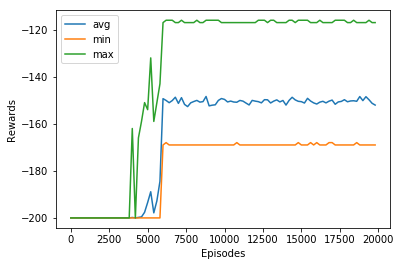

In [44]:
plt.plot(ep_rewards_recorder['ep'], ep_rewards_recorder['avg'], label = 'avg')
plt.plot(ep_rewards_recorder['ep'], ep_rewards_recorder['min'], label = 'min')
plt.plot(ep_rewards_recorder['ep'], ep_rewards_recorder['max'], label = 'max')
plt.legend(loc='upper left')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

# Present

In [47]:
done = False
state = env.reset()
used_step = 0
while not done:
    used_step += 1
    action = np.argmax(q_table[get_discrete_state(state)])
    next_state, _, done, _ = env.step(action)
    state = next_state
    env.render()
env.close()
print("have used {} steps".format(used_step))

have used 145 steps
